In [5]:
!pip install yfinance


In [6]:
import yfinance as yf
Cocacola = yf.Ticker('KO')
Cocacola.info

{'address1': 'One Coca-Cola Plaza',
 'city': 'Atlanta',
 'state': 'GA',
 'zip': '30313',
 'country': 'United States',
 'phone': '404 676 2121',
 'website': 'https://www.coca-colacompany.com',
 'industry': 'Beverages—Non-Alcoholic',
 'industryDisp': 'Beverages—Non—Alcoholic',
 'sector': 'Consumer Defensive',
 'longBusinessSummary': 'The Coca-Cola Company, a beverage company, manufactures, markets, and sells various nonalcoholic beverages worldwide. The company provides sparkling soft drinks, sparkling flavors; water, sports, coffee, and tea; juice, value-added dairy, and plant-based beverages; and other beverages. It also offers beverage concentrates and syrups, as well as fountain syrups to fountain retailers, such as restaurants and convenience stores. The company sells its products under the Coca-Cola, Diet Coke/Coca-Cola Light, Coca-Cola Zero Sugar, Diet Coke, Cherry Coke, Fanta Orange, Fanta Zero Orange, Fanta Zero Sugar, Fanta Apple, Sprite, Sprite Zero Sugar, Simply Orange, Simpl

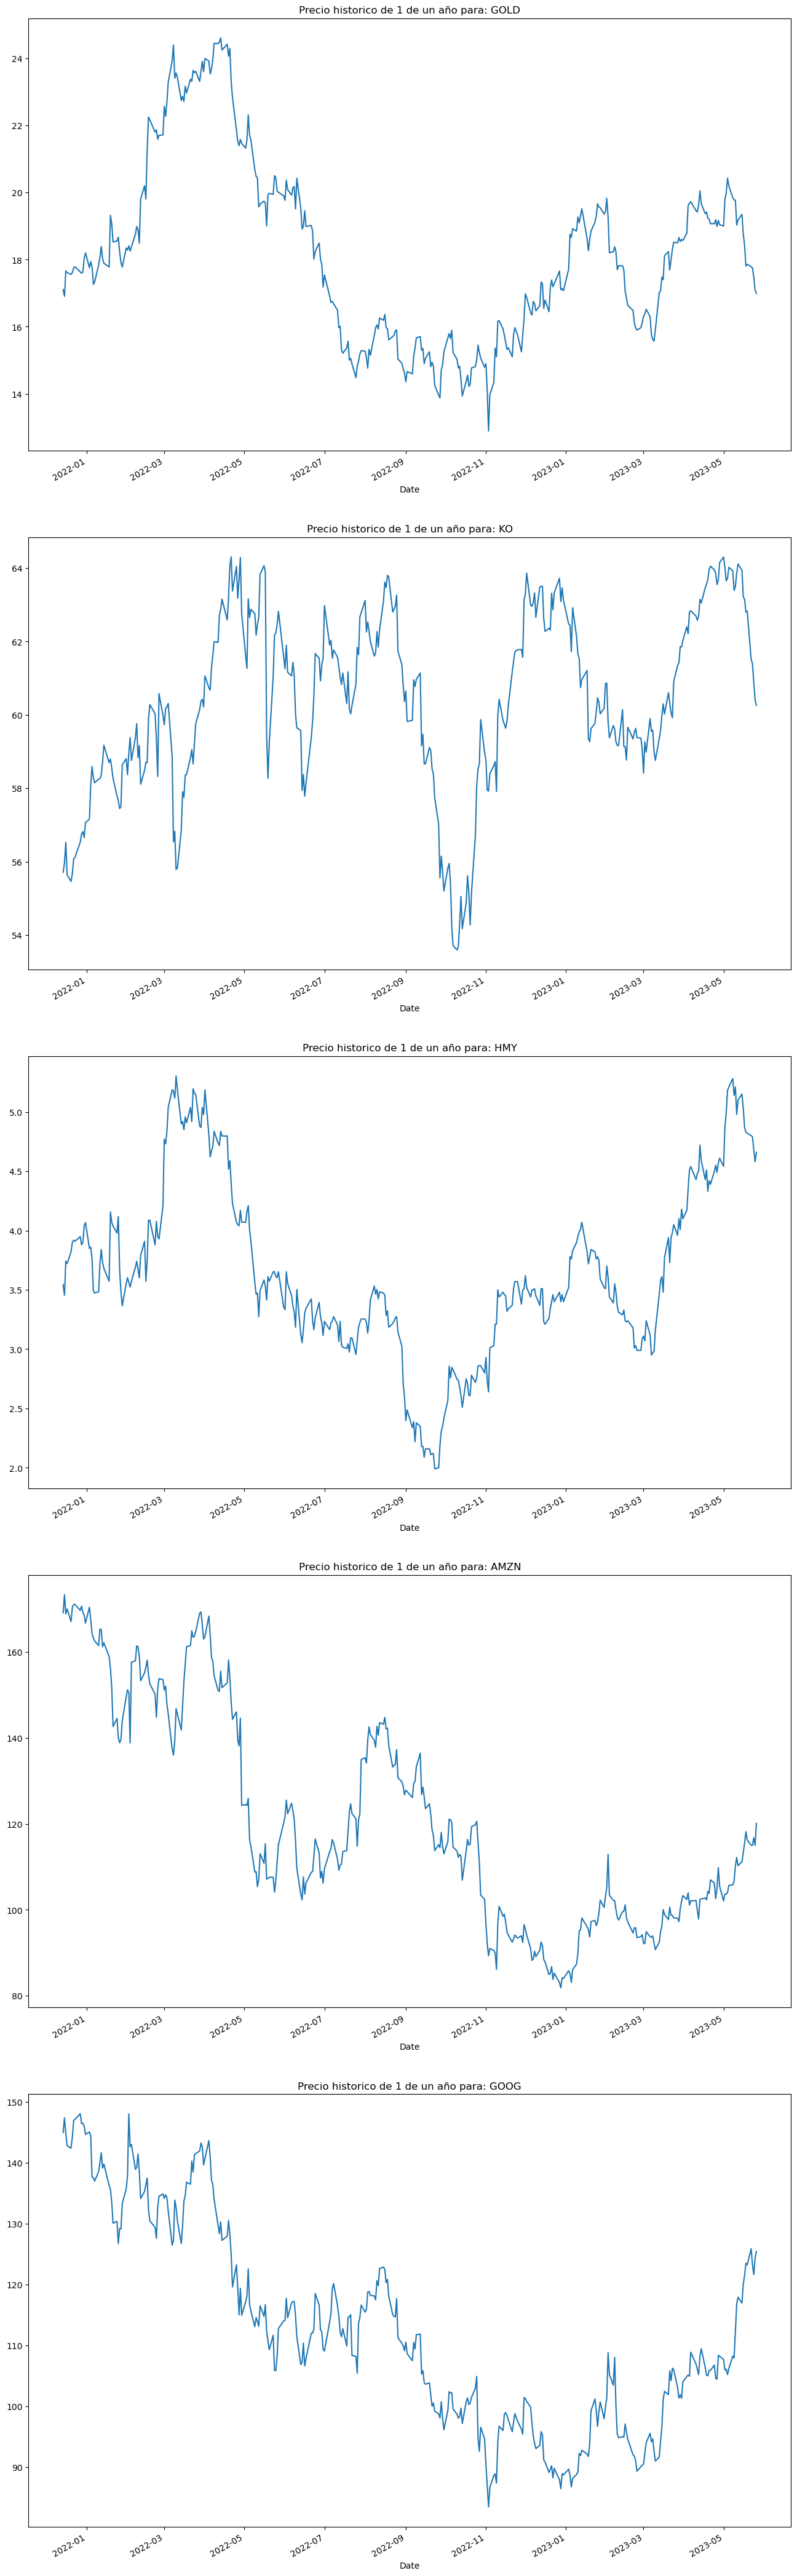

In [7]:
tickers = ['GOLD', 'KO', 'HMY','AMZN','GOOG'] # barrid gold, cocacola, harmonygold,amazon, google
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(tickers),1,i+1)
  current_ticker.history(period='365d')['Close'].plot(figsize=(16,60), title='Precio historico de 1 de un año para: '+ticker)

In [1]:
!pip install sqlalchemy

In [2]:
pip install psycopg2-binary


Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install yfinance
!pip install sqlalchemy
!pip install psycopg2-binary
import pandas as np


In [4]:
import yfinance as yf
hmy = yf.Ticker('HMY')
hist = hmy.history(period="1y")
hist['Date']=hist.index
hist=hist.reset_index(drop=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,3.662216,3.672167,3.582602,3.652264,3146500,0.0,0.0,2022-05-27 00:00:00-04:00
1,3.672167,3.692071,3.343762,3.353714,7838200,0.0,0.0,2022-05-31 00:00:00-04:00
2,3.363666,3.373617,3.264149,3.333810,3992600,0.0,0.0,2022-06-01 00:00:00-04:00
3,3.443279,3.692071,3.433327,3.652264,6818200,0.0,0.0,2022-06-02 00:00:00-04:00
4,3.592554,3.622409,3.502989,3.552747,4124700,0.0,0.0,2022-06-03 00:00:00-04:00
...,...,...,...,...,...,...,...,...
246,4.830000,4.880000,4.780000,4.800000,3166500,0.0,0.0,2023-05-22 00:00:00-04:00
247,4.740000,4.840000,4.740000,4.790000,3116100,0.0,0.0,2023-05-23 00:00:00-04:00
248,4.780000,4.800000,4.650000,4.680000,2967400,0.0,0.0,2023-05-24 00:00:00-04:00
249,4.590000,4.640000,4.540000,4.580000,2398300,0.0,0.0,2023-05-25 00:00:00-04:00


In [23]:
hist = hmy.history(period="1y")
hist['Date']=hist.index
hist=hist.reset_index(drop=True)
hist
hist= hist.rename(columns={"Open":"Apertura","High":"Precio_alto","Low":"Precio_bajo","Close":"Cierre","Volume":"Volumen","Dividends":"Dividendos","Stock Splits":"Stock","Date":"Dia"})
hist= hist.drop(columns=["Dividendos","Stock","Volumen"])
hist
                                  

,Apertura,Precio_alto,Precio_bajo,Cierre,Dia
0,3.662216,3.672167,3.582602,3.652264,2022-05-27 00:00:00-04:00
1,3.672167,3.692071,3.343762,3.353714,2022-05-31 00:00:00-04:00
2,3.363666,3.373617,3.264149,3.333810,2022-06-01 00:00:00-04:00
3,3.443279,3.692071,3.433327,3.652264,2022-06-02 00:00:00-04:00
4,3.592554,3.622409,3.502989,3.552747,2022-06-03 00:00:00-04:00
...,...,...,...,...,...
246,4.830000,4.880000,4.780000,4.800000,2023-05-22 00:00:00-04:00
247,4.740000,4.840000,4.740000,4.790000,2023-05-23 00:00:00-04:00
248,4.780000,4.800000,4.650000,4.680000,2023-05-24 00:00:00-04:00
249,4.590000,4.640000,4.540000,4.580000,2023-05-25 00:00:00-04:00


In [8]:
from sqlalchemy import create_engine
import pandas as pd


In [24]:
import psycopg2

In [25]:
url="redshift://data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com"
data_base="data-engineer-database"
user="user"
pwd = "password"


In [26]:
try:
    conn =psycopg2.connect( host="data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com",
                           dbname=data_base,
                           user=user,
                           password=pwd,
                           port="5439"
                          )
    print("me conecte")
except Exception as e:
    print("odio esto")
    print(e)             

me conecte


In [27]:
cur= conn.cursor()
cur.execute ("SELECT * FROM finanzas")
results = cur.fetchall()
results

[]

In [28]:
from psycopg2.extras import execute_values
cur = conn.cursor ()
table_name="finanzas"
columns=["Apertura","precio_alto","Precio_bajo","Cierre","Dia"]
values=[tuple(x) for x in hist.to_numpy()]
insert_sql= f"INSERT INTO {table_name} ({','.join(columns)}) VALUES %s"
cur.execute("BEGIN")
execute_values(cur, insert_sql, values)
cur.execute("COMMIT")